Flood prediction using logistic regression

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Exploratory data analysis

In [96]:
dataset = pd.read_excel("happy.csv.xlsx")
dataset.head()

,Rainfall,Max Temperature,Min Temperature,Relative Humidity,Flood
0,0.0,34.7,18.5,53.0,0
1,0.0,36.5,21.3,65.0,0
2,0.0,35.5,18.9,77.0,0
3,0.0,36.1,20.6,89.0,0
4,0.0,37.5,20.5,46.0,0


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rainfall           120 non-null    float64
 1   Max Temperature    120 non-null    float64
 2   Min Temperature    120 non-null    float64
 3   Relative Humidity  120 non-null    float64
 4   Flood              120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [98]:
dataset.describe()

,Rainfall,Max Temperature,Min Temperature,Relative Humidity,Flood
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,102.230000,33.881694,23.052174,70.634812,0.700000
std,104.075937,2.549828,2.024844,9.352608,0.460179
min,0.000000,29.600000,17.925806,46.000000,0.000000
25%,0.000000,31.487097,22.243354,64.466095,0.000000
50%,81.450000,34.046667,23.422581,73.032258,1.000000
75%,171.125000,35.906452,24.100000,78.214109,1.000000
max,438.200000,38.251724,26.700000,89.000000,1.000000


In [99]:
dataset['Flood'].value_counts()

Flood
1    84
0    36
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Max Temperature'}>],
       [<Axes: title={'center': 'Min Temperature'}>,
        <Axes: title={'center': 'Relative Humidity'}>],
       [<Axes: title={'center': 'Flood'}>, <Axes: >]], dtype=object)

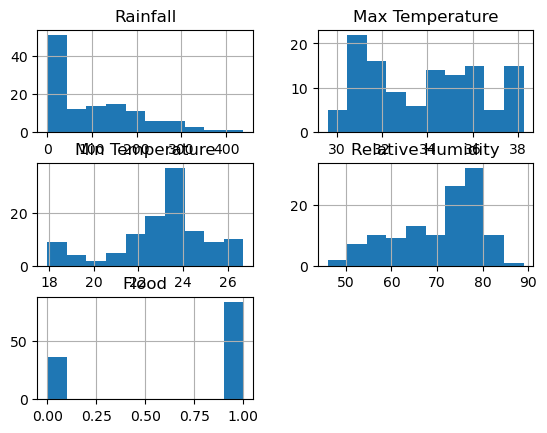

In [100]:
dataset.hist()

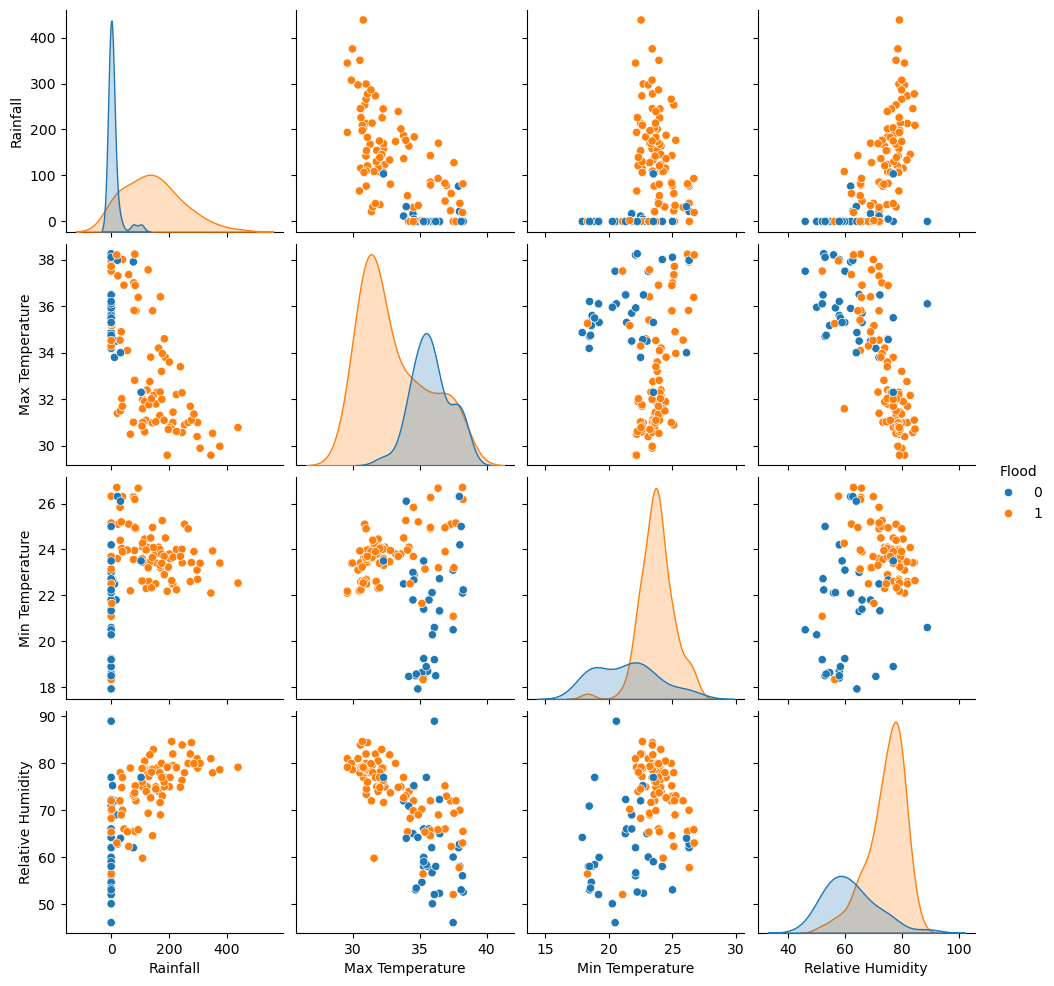

In [101]:
sns.pairplot(data=dataset,hue='Flood')

<Axes: xlabel='Rainfall', ylabel='Relative Humidity'>

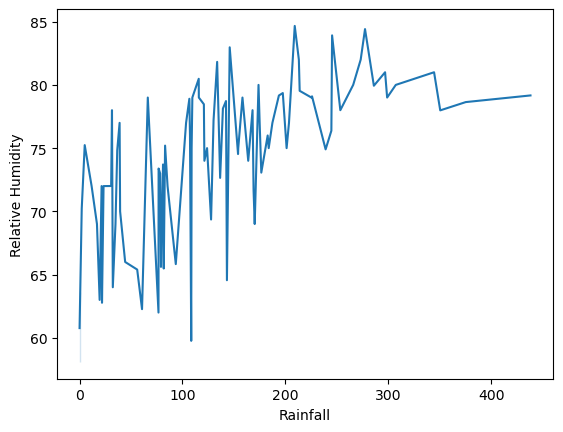

In [102]:
humidity = dataset.iloc[:,-2]
sns.lineplot(data=dataset,x="Rainfall",y=humidity)


In [103]:
corr = dataset.corr()
corr

,Rainfall,Max Temperature,Min Temperature,Relative Humidity,Flood
Rainfall,1.000000,-0.705483,0.273777,0.680426,0.598733
Max Temperature,-0.705483,1.000000,-0.018948,-0.732459,-0.502368
Min Temperature,0.273777,-0.018948,1.000000,0.308145,0.536269
Relative Humidity,0.680426,-0.732459,0.308145,1.000000,0.614402
Flood,0.598733,-0.502368,0.536269,0.614402,1.000000


<Axes: >

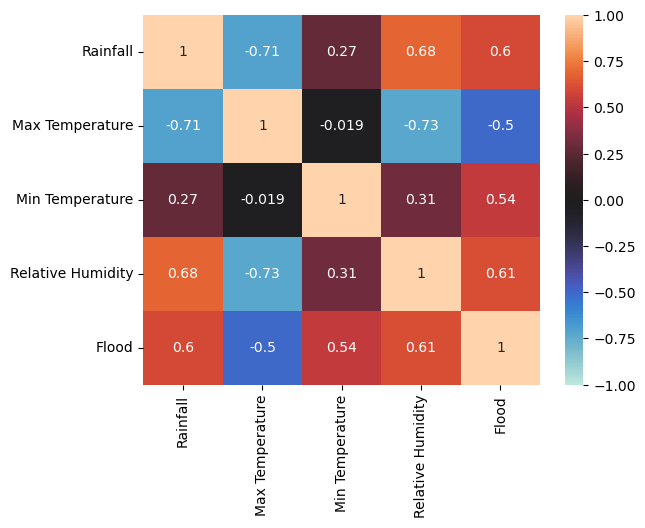

In [104]:
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

Feature Engineering

In [105]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,4]

splitting the dataset

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

training the model

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [110]:
predict = model.predict(xtest)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [111]:
from sklearn.metrics import r2_score

In [112]:
score = r2_score(ytest,predict)
score

0.2421052631578947

In [92]:
import joblib

In [41]:
joblib.dump(model,"logreg")

['logreg']